In [96]:
# import liarbary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
from sklearn.linear_model import LinearRegression
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

### Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

# Introduction
### Problem: 
1. Are there any relationships between Net hourly electrical energy output and others explanatory variables? 
2. What relationships between Net hourly electrical energy output and others explanatory variables?
3. What are the peak ranges for each variables?
4. Which explanatory variables appear to be relatively more predictive ?
4. What is the linear regression model when explanatory variables are Temperature and Exhaust Vacuum, response variable is Net hourly electrical energy output?
5. What is the linear regression model when explanatory variables Temperature, Exhaust Vacuum, Ambient Pressure, and Relative Humidity, response variable is Net hourly electrical energy output?
6. Which model is better?

### Step:
1. read dataset from github as dataframe
2. check basic information of dataframe
3. clean up data (make sure there are no null)
4. get the summary description of dataframe
5. create the histograms for each column to find the peak range.
6. create the scatter plots to find predictive explanatory variables.
7. create the headmap to see the correlations for all variables.
8. create the simple linear regression model.
9. create the cross validation to check the average accuracy
10. create the 4 explanatory variables linear regression model.
11. create the cross validation to check the average accuracy
12. find the model has higher average accuracy
13. create conclusion

In [98]:
# read the M2 dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/mandy941/DAV-Data-Science/master/cross%20validation-w1/M2_Data.csv?token=ANAIKYPIWLAEJYSL4NOMDL262RHQE')
df.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [99]:
# check data types of df
df.dtypes

T     float64
V     float64
AP    float64
RH    float64
EP    float64
dtype: object

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
T     9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
EP    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [101]:
# how many observations are contained within the example data set?
len(df)

9568

In [102]:
# check for all columns' missing values
df.isnull().sum()

T     0
V     0
AP    0
RH    0
EP    0
dtype: int64

# Using your Python skills, perform some basic exploratory data analysis (EDA)

In [103]:
# summary description
df.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010B6A3C36A0>,
      dtype=object)

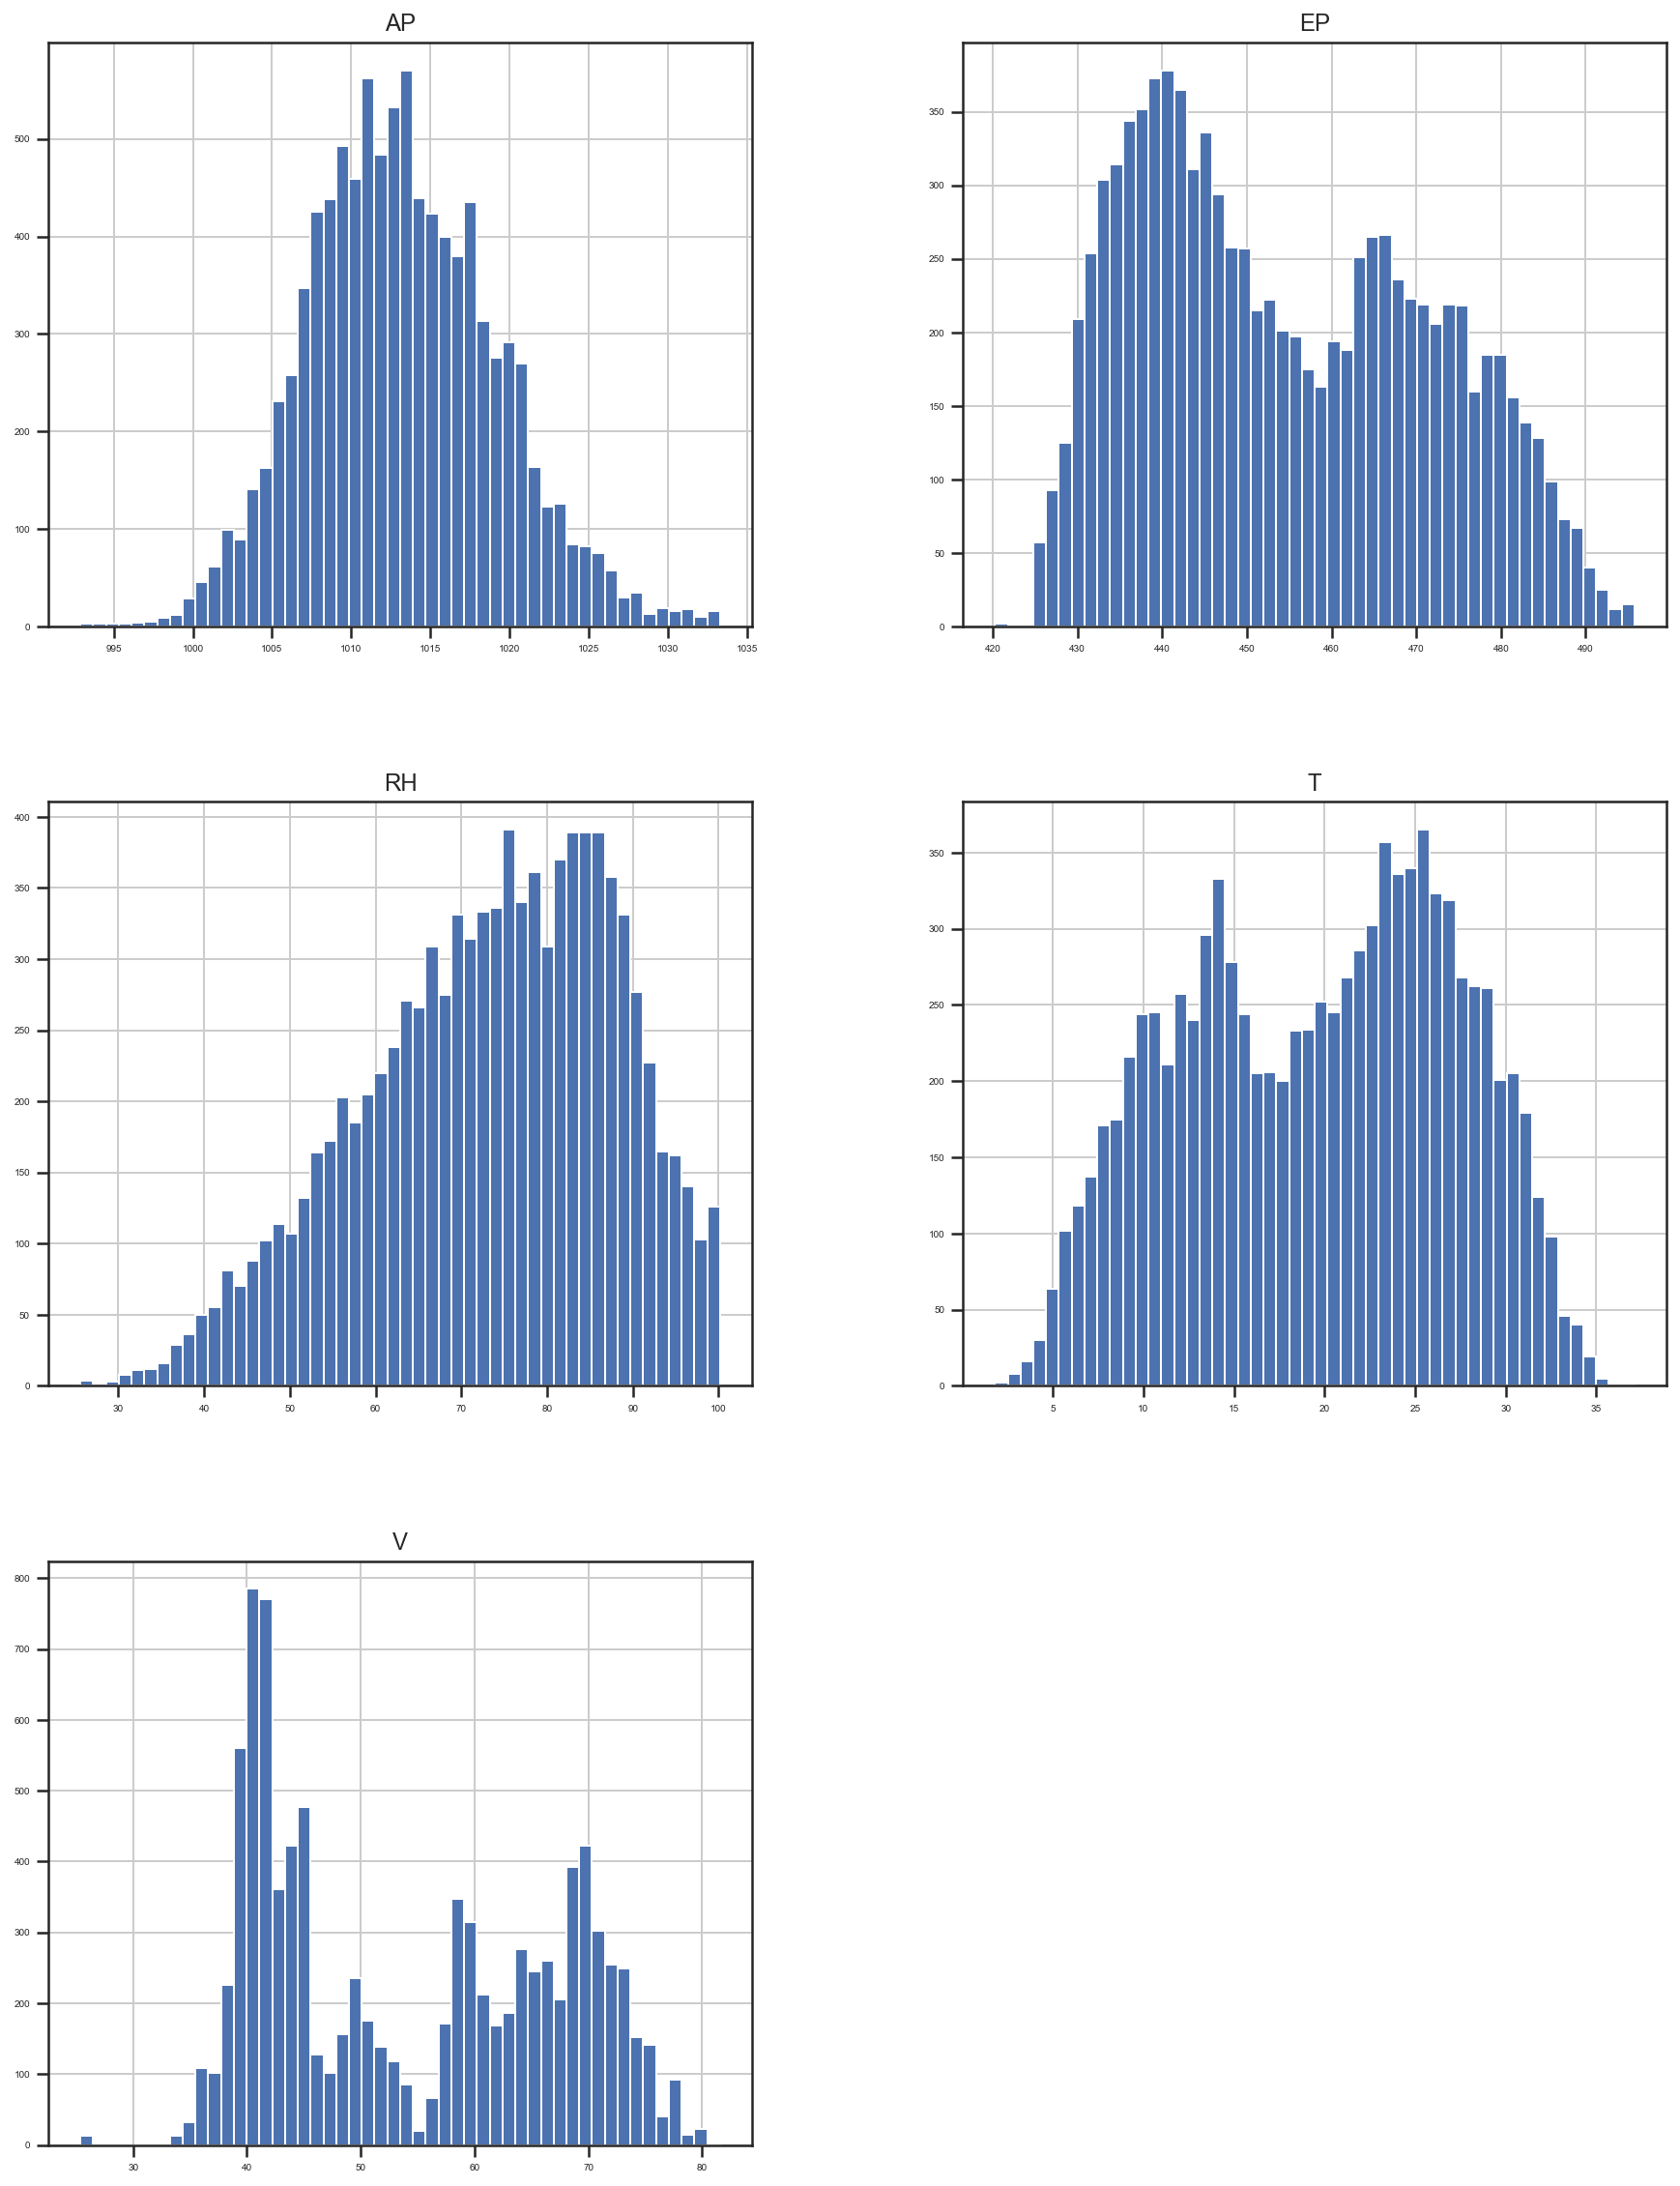

In [104]:
# create histogram for each columns of dataframe
df.hist(figsize=(15, 20), bins=50, xlabelsize=5, ylabelsize=5)

- The histogram of Temperature (T) tells us the peak range is 23-26 °C.
- The histogram of Ambient Pressure (AP) tells us the peak range is 1010-1015 milibar.
- The histogram of Relative Humidity (RH) tells us the peak range is 70 - 90%.
- The histogram of Exhaust Vacuum (V) tells us the peak range is 39 - 42 cm Hg.
- The histogram of Net hourly electrical energy output (EP) tells us the peak range is 430-450 MW.

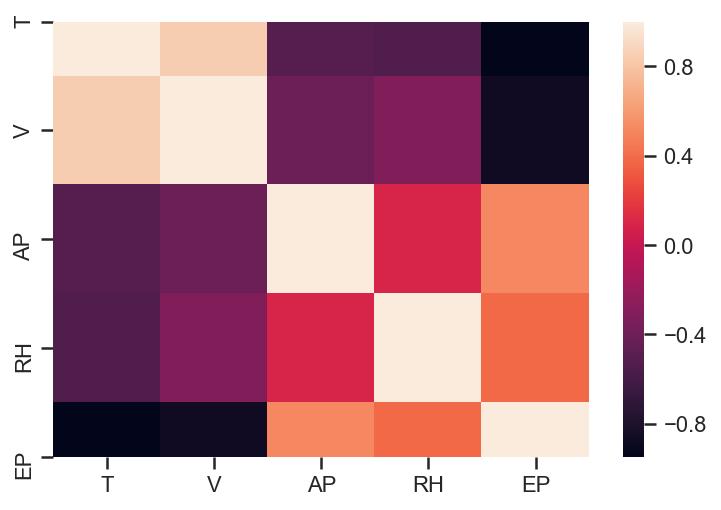

In [105]:
# create the correlation headmap for dataframe
auto_correlations = df.corr()
sns.heatmap(auto_correlations)

- Temperature(T) and Exhaust Vacuum(V) both have a strong negative relationship with Net hourly electrical energy output(EP).
- Ambient Pressure(AP) has a strong positive relationship with Net hourly electrical energy output(EP).

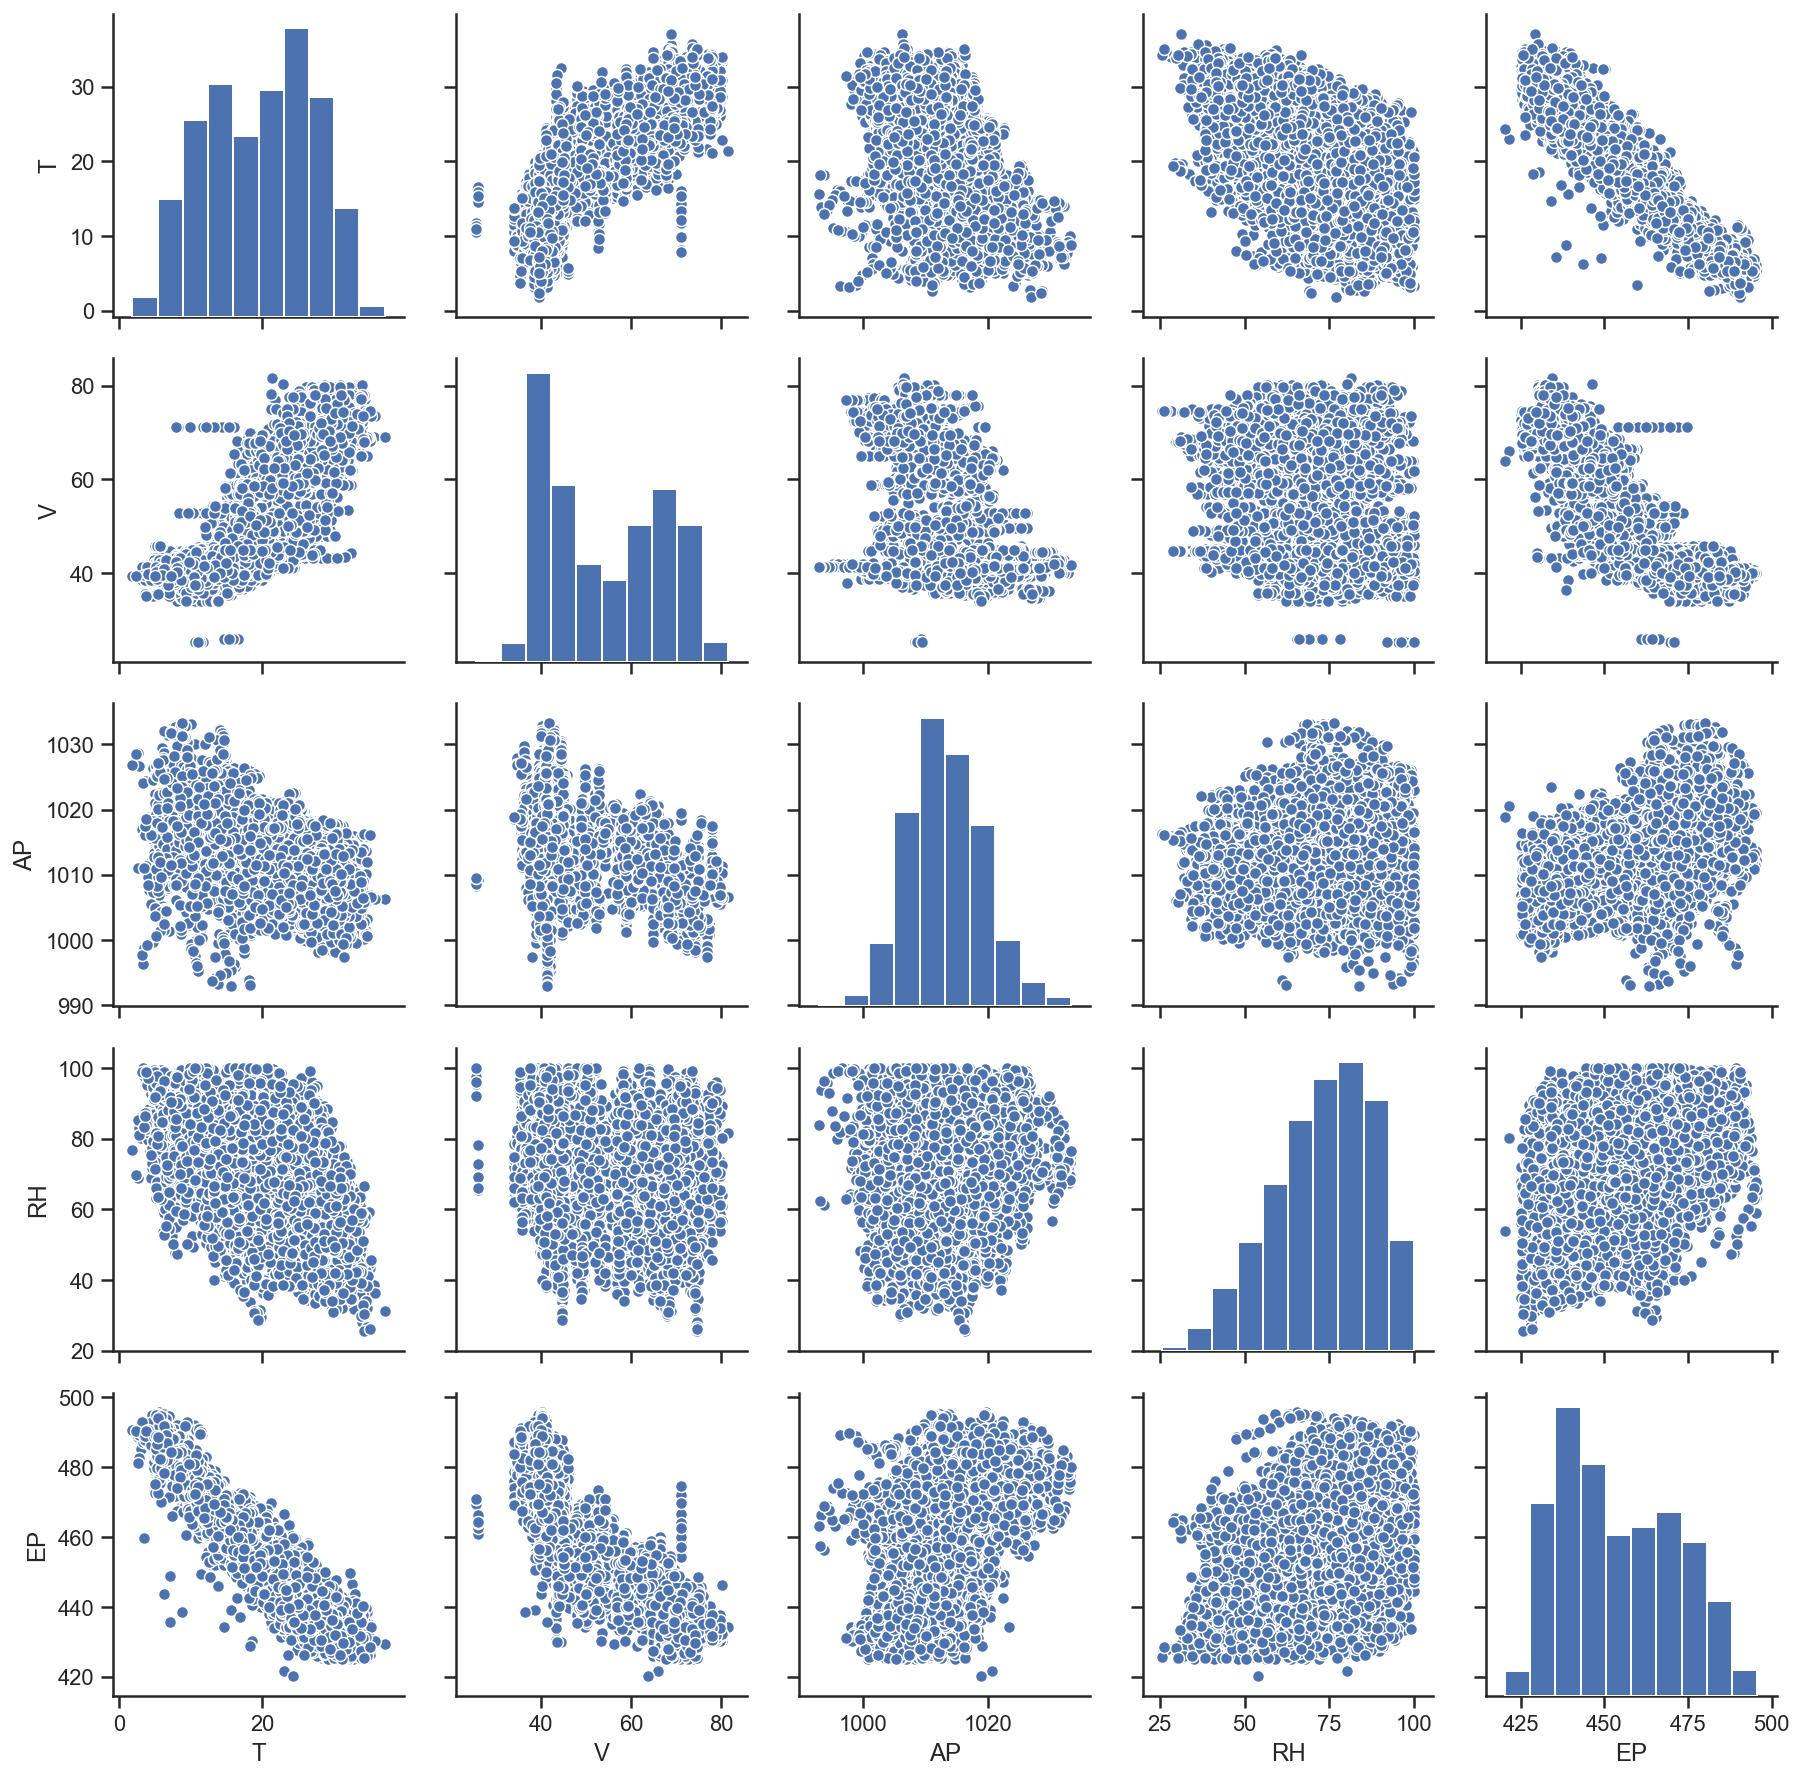

In [106]:
# use scatter plot to compare with one and another
sns.pairplot(df)

For Net hourly electrical energy output (EP), the response variable:
- Temperature(T) appear to be relatively more predictive, the scattler plots are closed to each others.
- Exhaust Vacuum(V) appear to be relatively more predictive, the scattler plots are closed to each others.
- Ambient Pressure (AP), and Relative Humidity (RH) do not appear to be relatively more predictive, the scattler plots are dispersive.

# Cross Validation of Linear regression model 1 

Consider the results of above basic exploratory data analysis, T and V is more predictive than others, I create the sample linear regression model just contains two explanatory variables T and V.

In [112]:
# import library
import statsmodels.api as sm
# create the string for the linear regression, EP as response variable, T and V as explanatory variaables
formula_string = "EP ~ T + V"
# use formula functions to create the regression model
model = sm.formula.ols(formula = formula_string, data = df)
# make model fit
model_fitted = model.fit()
# print the results
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 5.197e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        21:20:50   Log-Likelihood:                -28887.
No. Observations:                9568   AIC:                         5.778e+04
Df Residuals:                    9565   BIC:                         5.780e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    505.4774      0.240   2101.855      0.0

According to the results, I can create the the linear regression model EP = 505.4774 - 1.7043 * T - 0.3245 * V.

In [40]:
# move the response variable (in this case "EP") to a separate variable
y = df.EP
# check results
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: EP, dtype: float64

In [43]:
# If you want to preserve the original dataframe in its entirety, make a copy of the original dataframe 
# so that the original is preserved
X = df.copy()
# now drop the EP column from 'X' so that the response variable is removed from the explanatory variables
X.drop('EP', axis=1, inplace=True)
# The EP column has been removed from the data set
X.head()

,T,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [48]:
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=12)
# check the results
len(X_train1)

6697

In [49]:
len(X_test1)

2871

In [50]:
# check the row indices of the new objects to see whether they match
y_test1.head()

1371    446.36
4375    489.68
7994    426.48
5579    457.49
7297    450.97
Name: EP, dtype: float64

In [51]:
# check the row indices of the new objects to see whether they match
X_test1.head()

,T,V,AP,RH
1371,25.13,68.63,1013.57,43.44
4375,3.96,35.47,1016.79,83.81
7994,28.55,74.33,1011.77,73.34
5579,15.60,41.04,1025.48,64.43
7297,20.77,51.30,1013.89,88.72


In [52]:
# check the row indices of the new objects to see whether they match
X_train1.head()

,T,V,AP,RH
1090,12.57,39.30,1019.57,72.44
6137,25.27,69.89,1015.21,79.33
4703,12.57,41.66,1009.11,70.74
1901,13.80,39.82,1012.37,83.69
3704,18.80,47.83,1005.86,76.77


In [53]:
# check the row indices of the new objects to see whether they match
y_train1.head()

1090    473.67
6137    436.33
4703    475.61
1901    473.56
3704    453.90
Name: EP, dtype: float64

In [108]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# create a new dataframe containing only the T and V variables (our explanatory variables for the linear regression model)
newX_train = X_train1[['T', 'V']].copy()

# sanity check
newX_train.head()

,T,V
1090,12.57,39.30
6137,25.27,69.89
4703,12.57,41.66
1901,13.80,39.82
3704,18.80,47.83


In [109]:
# Assing the model function you want to use to a variable
model = LinearRegression()

# Set "K" = 10, a value that has been found through experimentation to generally result in a model with low bias and modest variance
scores = cross_val_score(model, newX_train, y_train1, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

[0.90125496 0.9188024  0.91232847 0.91858987 0.92210885 0.90963351
 0.91711569 0.91853757 0.91312528 0.91637728]


In [110]:
# calculate the average accuracy across all 10 folds
np.mean(scores)

0.9147873877833836

# Cross Validation of Linear regression model 2

In the second linear regression model, I add less predictive explanatory variables to the first model to see if it will decreases the accuracy.

In [113]:
# create the string for the linear regression, EP as response variable, T and V as explanatory variaables
formula_string = "EP ~ T + V + AP + RH"
# use formula functions to create the regression model
model = sm.formula.ols(formula = formula_string, data = df)
# make model fit
model_fitted = model.fit()
# print the results
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        21:23:07   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

According to the results, I can create the the linear regression model EP = 454.6093 - 1.9775  * T - 0.2339 * V + 0.0621 * AP - 0.1581 * RH.

In [75]:
# create a new dataframe containing T,V,AP,RH variables (our explanatory variables for the linear regression model)
newX_train = X_train1[['T','V','AP', 'RH']].copy()

# sanity check
newX_train.head()

,T,V,AP,RH
1090,12.57,39.30,1019.57,72.44
6137,25.27,69.89,1015.21,79.33
4703,12.57,41.66,1009.11,70.74
1901,13.80,39.82,1012.37,83.69
3704,18.80,47.83,1005.86,76.77


In [76]:
# Assing the model function you want to use to a variable
mode2 = LinearRegression()

# Set "K" = 10, a value that has been found through experimentation to generally result in a model with low bias and modest variance
scores = cross_val_score(mode2, newX_train, y_train1, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

[0.91716153 0.93249273 0.92539274 0.92903747 0.93497881 0.9240207
 0.93374583 0.93074018 0.91945051 0.9288868 ]


In [77]:
# calculate the average accuracy across all 10 folds
np.mean(scores)

0.9275907287106507

# Conclusion

- The simple linear regrassion model is EP = 505.4774 - 1.7043 * T - 0.3245 * V
- The complicated linear regrassion model is EP = 454.6093 - 1.9775 * T - 0.2339 * V + 0.0621 * AP - 0.1581 * RH
- According to the average accuracy across all 10 folds, the complicated linear regrassion model is better than simple one. The simple linear regression model contains temperature(T) and Exhaust Vacuum(V) 0.9147873877833836 average accuracy. The complicated linear regression model contains four explanatory variables,they are temperature(T), Exhaust Vacuum(V), Ambient Pressure (AP), and Relative Humidity (RH). And the model has 0.9275907287106507 average accuracy.